# Web scraping -- tables 
A small pratice project for directly scraping tables from the wiki and store the scraped data into a database. Data is also visualized using matplotlib for exploring the distribution of variables and correlations between variables. 

Packages for web scraping: 
-python 
-requests
-BeautifulSoup

Packages for database operations: 
-pandas
-sqlite3

Packages for plotting:
-numpy
-matplotlib

In [278]:
from requests import get
from bs4 import BeautifulSoup 
import pandas as pd

In [279]:
#specify the url
us_states = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'

#Query the website and return the html to the variable 'page'
page = get(us_states)

#Parse the html in the 'page' variable, and store it in Beautiful Soup format
soup = BeautifulSoup(page.content,"html.parser")


To look into the file to see how data is stored in soup, apply method 'prettify'. This method formats the html file in a structually nested manner.  

    print(soup.prettify())

Alternatively, the structure of the content can also be examined with web browers, such as Chrome and IE. Right click on the webpage and click "Inspect".

In [280]:
#Print the webpage title -- confirming the correct page is queried. 
print(soup.title)

<title>List of states and territories of the United States - Wikipedia</title>


In [281]:
#Getting all the tables
all_tables = soup.find_all('table')
#Finding the right table using the class 
target_table = soup.find('table', class_ = 'wikitable sortable plainrowheaders')
#print(target_table)

Extract the information from the target table to DataFrame by iterating through each row (tr) and then assign each element (i.e. 'td','div') to a variable and append it to a list. 

In [282]:
#Generate lists
var1 = []
var2 = []
var3 = []
var4 = []
var5 = []
var6 = []
var7 = []
var8 = []
var9 = []
var10 = []
var11 = []
var12 = []
for row in target_table.findAll('tr'):
    cells = row.findAll('td') #this does not include <td><div> cells
    divs = row.findAll('div') #save the <td><div> cells
    if len(cells) == 11: 
        #Capital is equivalent to the largest city, so the cell 'capital' and 'largest city' is combined. 
        var1.append(cells[0].find(text=True))
        var2.append(cells[1].find(text=True))
        var3.append(cells[1].find(text=True))
        var4.append(cells[2].find(text=True))
        var5.append(divs[0].find(text=True))
        var6.append(cells[4].find(text=True))
        var7.append(cells[5].find(text=True))
        var8.append(cells[6].find(text=True))
        var9.append(cells[7].find(text=True))
        var10.append(cells[8].find(text=True))
        var11.append(cells[9].find(text=True))
        var12.append(divs[1].find(text=True))
    elif len(cells) == 12:
        #Capital is not equilavent to the largest city. 
        var1.append(cells[0].find(text=True))
        var2.append(cells[1].find(text=True))
        var3.append(cells[2].find(text=True))
        var4.append(cells[3].find(text=True))
        var5.append(divs[0].find(text=True))
        var6.append(cells[5].find(text=True))
        var7.append(cells[6].find(text=True))
        var8.append(cells[7].find(text=True))
        var9.append(cells[8].find(text=True))
        var10.append(cells[9].find(text=True))
        var11.append(cells[10].find(text=True))
        var12.append(divs[1].find(text=True))

In [283]:
#Fix the data format
for i,item in enumerate(var1):
    var1[i] = str(item)
for i,item in enumerate(var2):
    var2[i] = str(item)
for i,item in enumerate(var3):
    var3[i] = str(item)
for i,item in enumerate(var4):
    var4[i] = str(item)
for i,item in enumerate(var5):
    var5[i] = int(item.replace(',',''))
for i,item in enumerate(var6):
    var6[i] = int(item.replace(',',''))
for i,item in enumerate(var7):
    var7[i] = int(item.replace(',',''))
for i,item in enumerate(var8):
    var8[i] = int(item.replace(',',''))
for i,item in enumerate(var9):
    var9[i] = int(item.replace(',',''))
for i,item in enumerate(var10):
    var10[i] = int(item.replace(',',''))
for i,item in enumerate(var11):
    var11[i] = int(item.replace(',',''))
for i,item in enumerate(var12):
    var12[i] = int(item.replace(',',''))

In [284]:
#Convert list to data frame. 
demo_df = pd.DataFrame(var1,columns=['State'])
demo_df['Capital'] = var2
demo_df['Largest_City'] = var3
demo_df['Established'] = var4
demo_df['Population'] = var5
demo_df['Total_Area_sqrtMi'] = var6
demo_df['Total_Area_sqrtKm'] = var7
demo_df['Land_Area_sqrtMi'] = var8
demo_df['Land_Area_sqrtKm'] = var9
demo_df['Water_Area_sqrtMi'] = var10
demo_df['Water_Area_sqrtKm'] = var11
demo_df['Reps'] = var12

#Remove the redudant columns. They can be calculated from the remaining data. 
demo_df.drop(['Total_Area_sqrtMi','Land_Area_sqrtMi','Water_Area_sqrtMi'], axis=1, inplace=True)
#Add a new column 'id' with incremental numbering
demo_df.insert(0, 'id', range(1, 1 + len(demo_df)))

#print(demo_df.head()) 

# Store scraped data in the SQL Server database

In [285]:
import sqlite3

In [286]:
#Connect to the database. If the database not exists, create a new one. 
conn = sqlite3.connect('us_states.db') #conn is the connect engine
cur = conn.cursor() #point a cursor at the target database

#Create a table to store the dataframe in the database. 
demo_df.to_sql("states_demo", conn, if_exists="replace")   

#Querying the database (first 4 rows) to make sure data is properly stored. 
pd.read_sql_query("SELECT * FROM states_demo WHERE id<5;", conn)

#Disconnect to the database. 
cur.close() 
conn.close()

# Query database and visualize data

In [287]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

In [288]:
#Reconnect to database
conn = sqlite3.connect('us_states.db')
cur = conn.cursor()

#Create new variables - Land_per_person and Water_per_person in the unit of square-meter
demo_df['Land_per_person'] = round(demo_df['Land_Area_sqrtKm']/demo_df['Population']*1000000,2)
demo_df['Water_per_person'] = round(demo_df['Water_Area_sqrtKm']/demo_df['Population']*1000000,2)
demo_df['Population_density'] = round(demo_df['Population']/demo_df['Land_Area_sqrtKm'])
demo_df.to_sql("states_demo", conn, if_exists="replace")


In [290]:
#Retrieving data from databse using pandas.read_sql_query. 
#Note that read_sql_query can't select multiple. It can either be * or a specific column 
st = pd.read_sql_query("SELECT State FROM states_demo;", conn)
pop = pd.read_sql_query("SELECT Population FROM states_demo;", conn)
pop_den = pd.read_sql_query("SELECT Population_density FROM states_demo;", conn)
total = pd.read_sql_query("SELECT Total_Area_sqrtKm FROM states_demo;", conn)
land = pd.read_sql_query("SELECT Land_Area_sqrtKm FROM states_demo;", conn)
land_pp = pd.read_sql_query("SELECT Land_per_person FROM states_demo;", conn)
rep = pd.read_sql_query("SELECT Reps FROM states_demo;", conn)

#Update the changes and turn off the connector 
conn.commit()
cur.close()
conn.close()

In [291]:
#Remove the header and create variables for later use 
state = st['State']
population = pop['Population']/1000000
population_density = pop_den['Population_density']
size = total['Total_Area_sqrtKm']/1000
representative = rep['Reps']
landpp = land_pp['Land_per_person']/1000

In [292]:
def simple_plot(x, y, bubble_size=1, yscale='log'):
    """
    Plot the distribution of y
    Arguments: 
    y_var -- a feature variable as the plot's y axis 
    bubble_size -- set the bubble size, defult as 1, which sets the size as y*1, if 2, then y**2
    yscale -- the scaling of y axis. Default is 'log'. Can be set as 'linear','symlog','logit'
    """
    
    #Set the total number of bubbles as the number of States
    N=len(state)

    #Choose some random colors
    colors=cm.rainbow(np.random.rand(N))

    #Use those colors as the color argument
    plt.scatter(x, y, s=y**bubble_size, color=colors, alpha=0.3)
    #Set the y axis as log scaling
    plt.yscale(yscale)

    #Labeling each bubble with State Abreviation. 
    for i in range(N):
        plt.annotate(x[i],xy=(x[i],y[i]))

    #Turn off all the ticks for x axis
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off

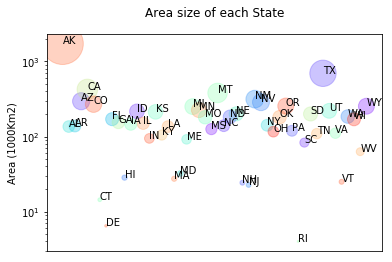

In [293]:
#Plot the distribution of area size
simple_plot(state, size, bubble_size=1, yscale='log')
plt.ylabel('Area (1000Km2)')
#Move title up with the "y" option so there is space between the upper border and title
plt.title('Area size of each State', y=1.05)
plt.show()

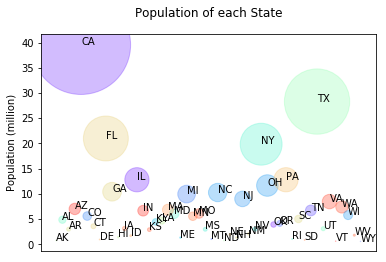

In [294]:
#Plot the distribution of population
simple_plot(state, population, bubble_size=2.5, yscale='linear')
plt.ylabel('Population (million)')
#Move title up with the "y" option so there is space between the upper border and title
plt.title('Population of each State', y=1.05)
plt.show()

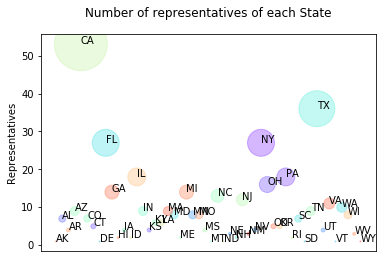

In [295]:
#Plot the distribution of representative
simple_plot(state, representative, bubble_size=2, yscale='linear')
plt.ylabel('Representatives')
#Move title up with the "y" option so there is space between the upper border and title
plt.title('Number of representatives of each State', y=1.05)
plt.show()

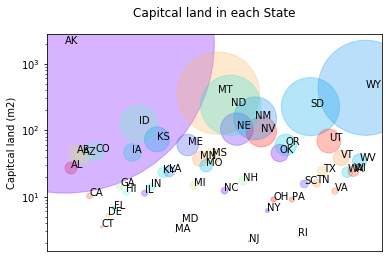

In [296]:
#Plot the distribution of capitcal land
simple_plot(state, landpp, bubble_size=1.5, yscale='log')
plt.ylabel('Capitcal land (m2)')
#Move title up with the "y" option so there is space between the upper border and title
plt.title('Capitcal land in each State', y=1.05)
plt.show()

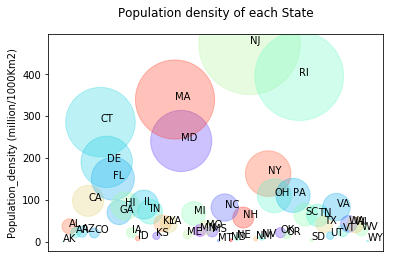

In [297]:
#Plot the distribution of population density
simple_plot(state, population_density, bubble_size=1.5, yscale='linear')
plt.ylabel('Population_density (million/1000Km2)')
#Move title up with the "y" option so there is space between the upper border and title
plt.title('Population density of each State', y=1.05)
plt.show()

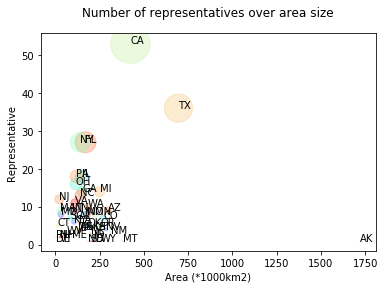

In [298]:
#Plot the number of representative as a function of total area in all the States 
#to see if area is the key factor

#Set the total number of bubbles as the number of States
N=len(state)
# Choose some random colors
colors=cm.rainbow(np.random.rand(N))

# Use those colors as the color argument
plt.scatter(size, representative, s=population**2, color=colors, alpha=0.3)
for i in range(N):
    plt.annotate(state[i],xy=(size[i],representative[i]))
plt.xlabel('Area (*1000km2)')
plt.ylabel('Representative')

# Move title up with the "y" option
plt.title('Number of representatives over area size',y=1.05)
plt.show()

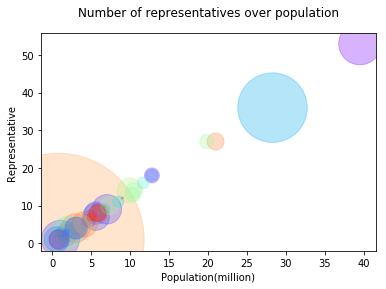

In [299]:
#Plot the number of representative as a function of population in all the States 
#to see if population is the key factor

#Set the total number of bubbles as the number of States
N=len(state)

# Choose some random colors
colors=cm.rainbow(np.random.rand(N))


# Use those colors as the color argument
plt.scatter(population, representative, s=(size/10)**2, color=colors, alpha=0.3)
#for i in range(N):
 #   plt.annotate(state[i],xy=(population[i]+3,representative[i]))
plt.xlabel('Population(million)')
plt.ylabel('Representative')

# Move title up with the "y" option
plt.title('Number of representatives over population',y=1.05)
plt.show()

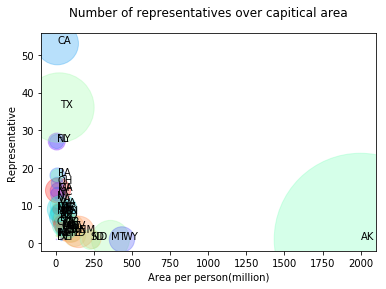

In [300]:
#Plot the number of representative as a function of capitcal land

#Set the total number of bubbles as the number of States
N=len(state)
#Choose some random colors
colors=cm.rainbow(np.random.rand(N))


# Use those colors as the color argument
plt.scatter(landpp, representative, s=(size/10)**2, color=colors, alpha=0.3)
for i in range(N):
    plt.annotate(state[i],xy=(landpp[i]+3,representative[i]))
plt.xlabel('Area per person(million)')
plt.ylabel('Representative')

# Move title up with the "y" option
plt.title('Number of representatives over capitical area',y=1.05)
plt.show()

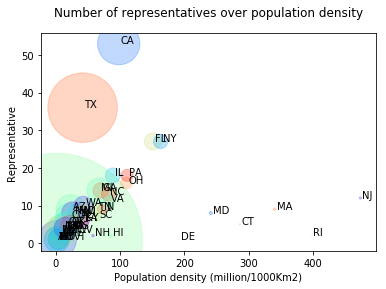

In [301]:
#Plot the number of representative as a function of population density

#Set the total number of bubbles as the number of States
N=len(state)
#Choose some random colors
colors=cm.rainbow(np.random.rand(N))


# Use those colors as the color argument
plt.scatter(population_density, representative, s=(size/10)**2, color=colors, alpha=0.3)
for i in range(N):
    plt.annotate(state[i],xy=(population_density[i]+3,representative[i]))
plt.xlabel('Population density (million/1000Km2)')
plt.ylabel('Representative')

# Move title up with the "y" option
plt.title('Number of representatives over population density',y=1.05)
plt.show()